In [19]:
## Might be needed in google colab
#!git clone https://github.com/GordonOboh/DeepLearningModel-ToIdentifyHumanSubjects.git;
#!pip install segmentation-models-pytorch;
#!pip install -U git+https://github.com/albumentations-team/albumentations;
#!pip install --upgrade opencv-contrib-python;

fatal: destination path 'DeepLearningModel-ToIdentifyHumanSubjects' already exists and is not an empty directory.
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-oa1pgnn_
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-oa1pgnn_
  Resolved https://github.com/albumentations-team/albumentations to commit c7d6f0dc271accc7b6cf7d8d73617a9c0cf141f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [20]:
## Might be needed in google colab
#from google.colab import drive
#drive.mount('/content/drive/')

import sys
import importlib.util
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


sys.path.append('./DeepLearningModel-ToIdentifyHumanSubjects/')
import necessary as nec

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
MODEL_DIR = './DeepLearningModel-ToIdentifyHumanSubjects/implementation/best_model_cpu.pt'
#generate use.csv before this step with CSV_FILE
CSV_FILE = './DeepLearningModel-ToIdentifyHumanSubjects/implementation/use.csv'
SEGMENTATION_DIR = './DeepLearningModel-ToIdentifyHumanSubjects/implementation/Your_DataSet_Segmentation'

DEVICES = {"cpu":"cpu",
           "gpu":"cuda",
           "tpu":"xla",
           "mac":"mps"}

DEVICE = DEVICES["cpu"]

EPOCHS = 25
LR = 0.003
IMAGE_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0' # https://smp.readthedocs.io/en/latest/encoders.html
WEIGHTS = 'imagenet' #find source for weights

In [22]:
df = pd.read_csv(CSV_FILE)

train_df, valid_df = df, df

model = nec.SegmentationModel(ENCODER,WEIGHTS)
model.to(DEVICE)

model.load_state_dict(torch.load(MODEL_DIR))
model.eval()  # Set the model to evaluation mode

validset = nec.SegmentationDataset(valid_df, nec.albumentation_addon.get_valid_augs(IMAGE_SIZE))

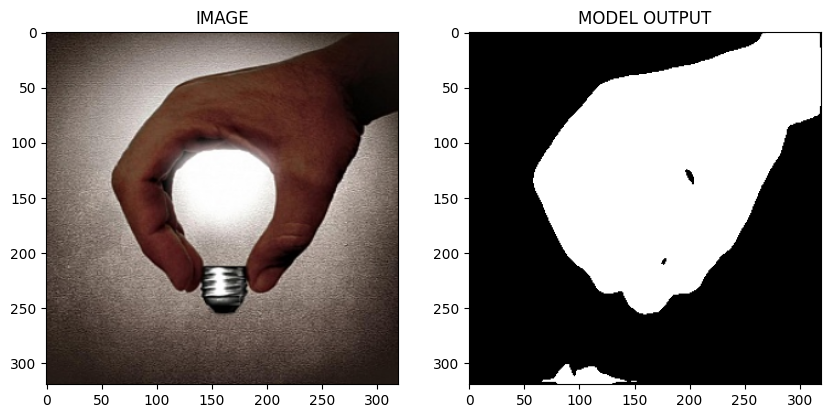

In [23]:
image, _ = validset[0]
logits_mask = model(image.to(DEVICE).unsqueeze(0))
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.5)*1.0

pred_image = pred_mask.detach().cpu().squeeze(0)
nec.helper().show_image(image=image, mask = None, image_from_model=pred_image)


In [25]:
# Loop through each row in the DataFrame
import os
save_dir = os.path.expanduser(SEGMENTATION_DIR)
os.makedirs(save_dir, exist_ok=True)
number_of_dataset = len(validset)
for index, row in df.iterrows():

    image, _ = validset[index]
    if index % 100 == 0:
      print(f"{index} 0f {number_of_dataset}")
    logits_mask = model(image.to(DEVICE).unsqueeze(0))
    pred_mask = torch.sigmoid(logits_mask)
    pred_mask = (pred_mask > 0.5)*1.0

    pred_image = pred_mask.detach().cpu().squeeze(0)

    image_path = row['images']

    # Extract the filename
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    new_filename = f"{name}_seg{ext}"
    save_path = os.path.join(save_dir, new_filename)

    # Transpose the image if necessary
    pred_image = np.transpose(pred_image, (1, 0, 2))

    # Save the pred_image
    plt.imsave(save_path, pred_image.squeeze(), cmap='gray')

print(f'Images saved at {save_dir}')

0 0f 2054
100 0f 2054
200 0f 2054
300 0f 2054
400 0f 2054
500 0f 2054
600 0f 2054
700 0f 2054
800 0f 2054
900 0f 2054
1000 0f 2054
1100 0f 2054
1200 0f 2054
1300 0f 2054
1400 0f 2054
1500 0f 2054
1600 0f 2054
1700 0f 2054
1800 0f 2054
1900 0f 2054
2000 0f 2054
Images saved at ./DeepLearningModel-ToIdentifyHumanSubjects/implementation/Your_DataSet_Segmentation
